# Thera Bank Analysis

### Importing basic libraries

In [1]:
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Understanding

In [3]:
#Reading the dataset
bank_df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [4]:
#Looking at the top 5 rows
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
#Looking at the shape
print('No. of rows in the dataset = ', bank_df.shape[0])
print('No. of columns in the dataset = ', bank_df.shape[1])

No. of rows in the dataset =  5000
No. of columns in the dataset =  14


In [6]:
#Looking at dtypes and null values
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**There seem to be no null values in the data**  
**All the attributes are numerical in nature.**

### Exploratory Data Analysis

In [7]:
#Getting a summary of the data
bank_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [8]:
#Class distribution
bank_df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

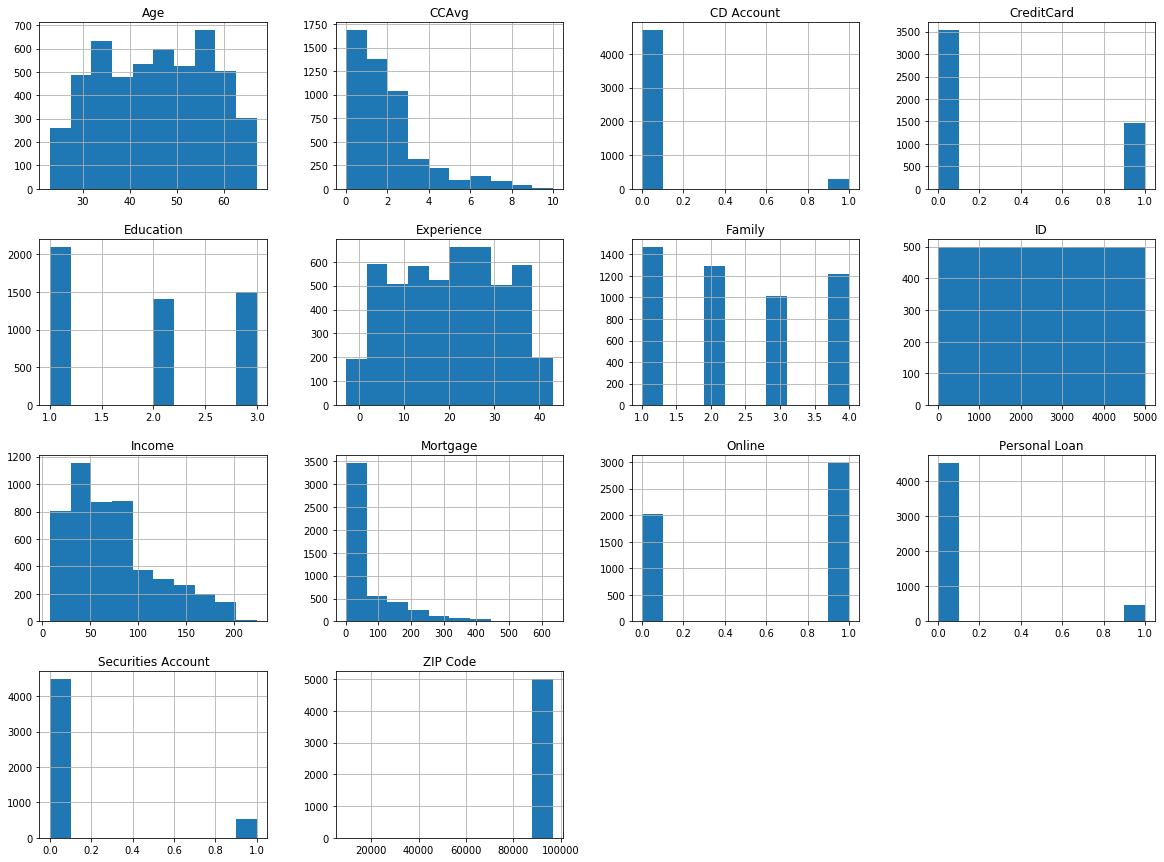

In [9]:
#Plotting histogram of each column
bank_df.hist(figsize = (20,15))
plt.show()

**Insights:**
1. CCAvg, Income and Mortage are significantly right skewed
2. Very few customers have a Certificate of Deposit (CD) account
3. 60% of customers use online internet banking services
4. Very few customers have a securities account with the bank
5. Family, Experience and Age seem to be distributed uniformly across the bank's customers
6. Almost two thirds of the bank's customers do not use a credit card issued by the bank
7. Only a small fraction of customers have applied for a personal loan from the bank

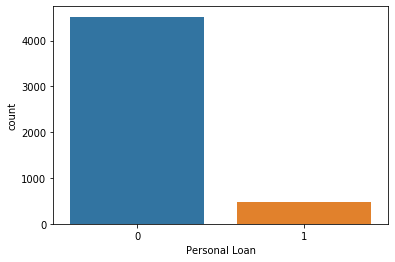

In [10]:
#Distribution of the target class
sns.countplot(data = bank_df, x = 'Personal Loan')

### The class is highly imbalanced -> Requires Resampling!!

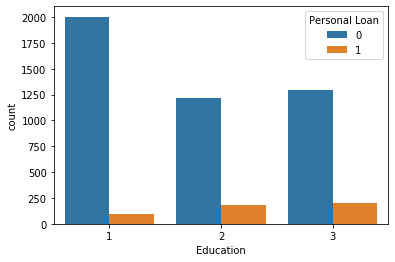

In [11]:
#Plotting Education vs Personal Loan
sns.countplot(data = bank_df, x = 'Education', hue= 'Personal Loan')

In [12]:
#Getting counts of Personal Loan with Education
bank_df[bank_df['Personal Loan'] == 1].groupby('Education')['ID'].count()

Education
1     93
2    182
3    205
Name: ID, dtype: int64

**Insight: As education increases the number of customers taking a personal loan also increases**

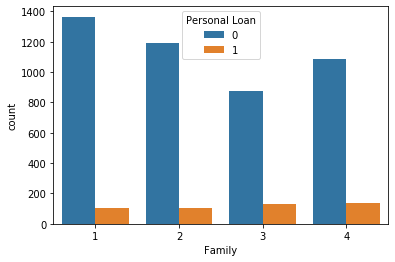

In [13]:
#Plotting Family vs Personal Loan
sns.countplot(data = bank_df, x = 'Family', hue= 'Personal Loan')

In [14]:
#Getting counts of Personal Loan with Family
bank_df[bank_df['Personal Loan'] == 1].groupby('Family')['ID'].count()

Family
1    107
2    106
3    133
4    134
Name: ID, dtype: int64

**Insight: There seems to be a slightly higher count where family size is > 2**

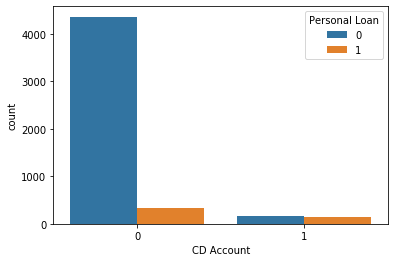

In [15]:
#Plotting CD Account vs Personal Loan
sns.countplot(data = bank_df, x = 'CD Account', hue= 'Personal Loan')

In [16]:
#Getting counts of Personal Loan with Family
print('Ratio of customers that have taken a loan and also have a CD Account = %.3f'%(bank_df[bank_df['Personal Loan'] == 1].groupby('CD Account')['ID'].count()[1]/bank_df[bank_df['CD Account'] == 1]['ID'].count()))

Ratio of customers that have taken a loan and also have a CD Account = 0.464


**Insight: This indicates that a customer having a CD account is a strong factor in determining whether he would take a personal loan**

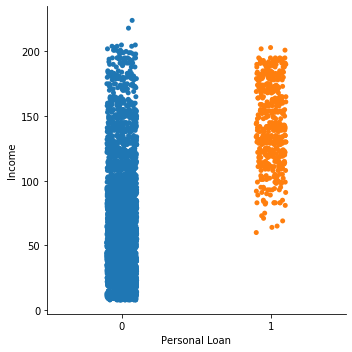

In [17]:
#Plotting Income vs Personal Loan
sns.catplot(data = bank_df, x = 'Personal Loan', y = 'Income')

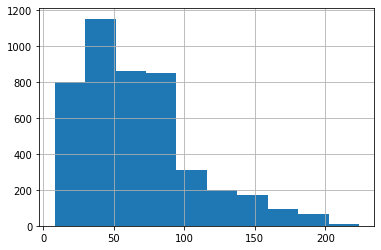

In [18]:
#Distribution of incomes among customers that have not taken a personal loan
bank_df[bank_df['Personal Loan'] == 0]['Income'].hist()

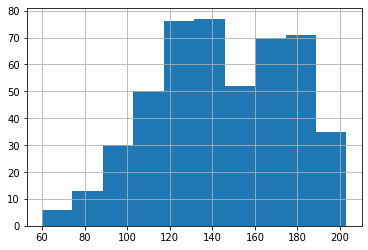

In [19]:
#Distribution of incomes of customers that have taken a personal loan
bank_df[bank_df['Personal Loan'] == 1]['Income'].hist()

**Insight: There seems to be a significant difference in the income distribution between the two segments. Customers typically have a higher income (Starts around 60k) if they have taken a personal loan**

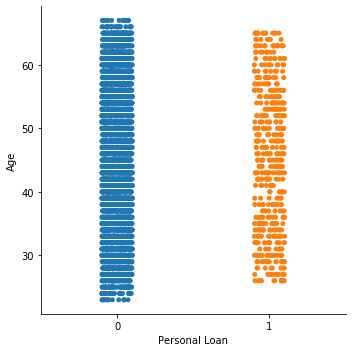

In [20]:
#Plotting Age vs Personal Loan
sns.catplot(data = bank_df, x = 'Personal Loan', y = 'Age')

**No significant difference in Age between customers in the two segments**

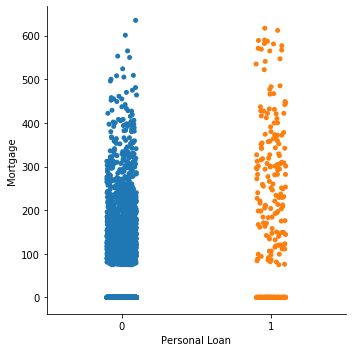

In [21]:
#Plotting Mortgage vs Personal Loan
sns.catplot(data = bank_df, x = 'Personal Loan', y = 'Mortgage')

In [22]:
#Getting the counts of Mortgage greater than 500 in the two groups
bank_df[bank_df['Mortgage'] > 500]['Personal Loan'].value_counts()

1    16
0     9
Name: Personal Loan, dtype: int64

**Insight: There seems to be a realtively higher concentration of customers that have high mortgages amongst the ones that have taken a personal loan**

### Correlations
**As the target variable is categorical, pair plot and correlation matrix will not be very useful**  
**We shall still plot the correlation matrix to see relationship among other variables.**

In [23]:
#We can drop the ID and the Zip Code columns as they are not useful in predicting the target
bank_df.drop(columns=['ID','ZIP Code'], inplace=True, axis = 1)

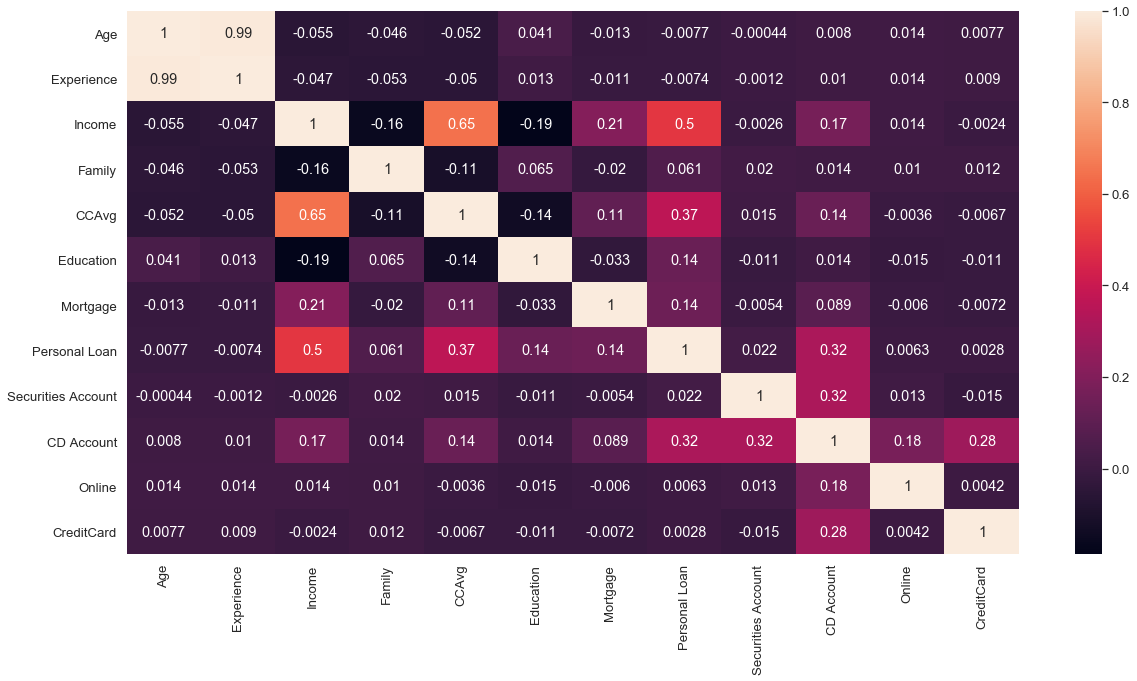

In [24]:
#Plotting the correlation matrix
plt.figure(figsize = (20,10))
sns.set(font_scale = 1.2)
sns.heatmap(bank_df.corr(), annot = True)
plt.show()

### Insights on Features
**Good features based on the correlation matrix and the EDA are:**
1. Income
2. Education
3. CD Account
4. CCAvg

### Train Test Split

In [25]:
#Converting Education and Family to Categorical type 
bank_df['Education'] = bank_df['Education'].astype('O')
bank_df['Family'] = bank_df['Family'].astype('O')

In [26]:
#Getting the feature set
X = pd.get_dummies(bank_df[['Experience', 'Income','Family', 'CCAvg',
       'Education', 'Mortgage' ,'Securities Account',
       'CD Account', 'Online', 'CreditCard']], drop_first=True)

In [27]:
#Getting the target set
y = bank_df['Personal Loan']

In [28]:
#Splitting the data into test and train
#Ensuring a stratified split so that the minority class is present in both sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y ,random_state = 1)

### Resampling the training data

In [29]:
#Using Synthetic Minority Oversampling Technique (SMOTE) 
from imblearn.over_sampling import SMOTE

In [30]:
#Setting ratio between minority and majority class as 1
sm = SMOTE(random_state=1, sampling_strategy=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

--------------

## Model Building

### Iteration 1: Logistic Regression

In [31]:
#Importing Logistic Regression 
from sklearn.linear_model import LogisticRegression
#Creating the model object
Logr = LogisticRegression()
#Fitting the model on the training data
Logr.fit(X_train, y_train)
#Predicting the target on the testing set
y_pred_Logr = Logr.predict(X_test)

In [32]:
from sklearn.metrics import f1_score, recall_score, accuracy_score, classification_report, confusion_matrix

In [33]:
#Printing performance metrics
print('Accuracy for Logr: %.2f'%(accuracy_score(y_test, y_pred_Logr)))
print('F1 score for Logr : %.2f'%(f1_score(y_test, y_pred_Logr)))
print('Recall score for Logr: %.2f'%(recall_score(y_test, y_pred_Logr)))

Accuracy for Logr: 0.88
F1 score for Logr : 0.55
Recall score for Logr: 0.74


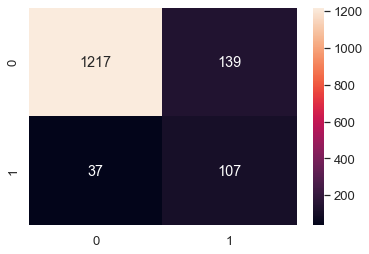

In [34]:
#Looking at the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_Logr), annot = True, fmt = 'd')

In [35]:
#Looking at the classification report
print(classification_report(y_test, y_pred_Logr))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1356
           1       0.43      0.74      0.55       144

    accuracy                           0.88      1500
   macro avg       0.70      0.82      0.74      1500
weighted avg       0.92      0.88      0.90      1500



### Iteration 2: KNN Classifier

In [36]:
#Importing Logistic Regression 
from sklearn.neighbors import KNeighborsClassifier
#Creating the model object
KNC = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
#Fitting the model on the training data
KNC.fit(X_train, y_train)
#Predicting the target on the testing set
y_pred_KNC = KNC.predict(X_test)

In [37]:
#Printing performance metrics
print('Accuracy for KNC: %.2f'%(accuracy_score(y_test, y_pred_KNC)))
print('F1 score for KNC : %.2f'%(f1_score(y_test, y_pred_KNC)))
print('Recall score for KNC: %.2f'%(recall_score(y_test, y_pred_KNC)))

Accuracy for KNC: 0.86
F1 score for KNC : 0.50
Recall score for KNC: 0.74


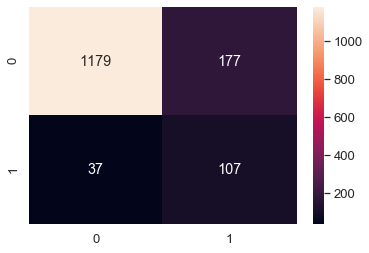

In [38]:
#Looking at the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_KNC), annot = True, fmt = 'd')

In [39]:
#Printing classification report
print(classification_report(y_test, y_pred_KNC))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1356
           1       0.38      0.74      0.50       144

    accuracy                           0.86      1500
   macro avg       0.67      0.81      0.71      1500
weighted avg       0.91      0.86      0.88      1500



### Iteration 3: Gaussian NB

In [40]:
#Importing the Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
#Creating the model object
GNB = GaussianNB()
#Fitting the model on the training data
GNB.fit(X_train, y_train)
#Predicting the target on the testing set
y_pred_GNB = GNB.predict(X_test)

In [41]:
#Printing performance metrics
print('Accuracy for GNB: %.2f'%(accuracy_score(y_test, y_pred_GNB)))
print('F1 score for GNB: %.2f'%(f1_score(y_test, y_pred_GNB)))
print('Recall score for GNB: %.2f'%(recall_score(y_test, y_pred_GNB)))

Accuracy for GNB: 0.86
F1 score for GNB: 0.44
Recall score for GNB: 0.58


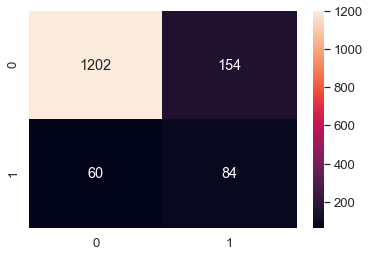

In [42]:
#Looking at the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_GNB), annot = True, fmt = 'd')

In [43]:
#Printing classification report
print(classification_report(y_test, y_pred_GNB))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1356
           1       0.35      0.58      0.44       144

    accuracy                           0.86      1500
   macro avg       0.65      0.73      0.68      1500
weighted avg       0.89      0.86      0.87      1500



### Iteration 4: Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
#Fitting the model on the training data
RFC.fit(X_train, y_train)
#Predicting the target on the testing set
y_pred_RFC = RFC.predict(X_test)

In [45]:
#Printing performance metrics
print('Accuracy for RFC: %.2f'%(accuracy_score(y_test, y_pred_RFC)))
print('F1 score for RFC: %.2f'%(f1_score(y_test, y_pred_RFC)))
print('Recall score for RFC: %.2f'%(recall_score(y_test, y_pred_RFC)))

Accuracy for RFC: 0.94
F1 score for RFC: 0.72
Recall score for RFC: 0.85


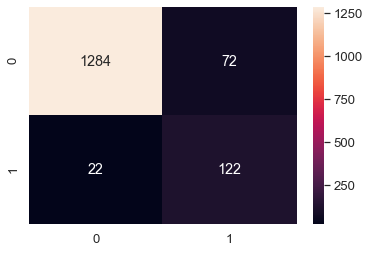

In [46]:
#Looking at the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_RFC), annot = True, fmt = 'd')

----------------

### Hyper Parameter Tuning - RandomForestClassifier

Since this is more about predicting the minority class better, i.e, the number of people who have taken a personal loan.  
We have to optimize the **recall** of the model. Since our Random Forest Classifier has shown the best recall so far,    
we shall further tune this to **maximize** recall.

In [47]:
#Using Randomized Search
from sklearn.model_selection import RandomizedSearchCV
#Creating the Param_Grid
param_grid = {
    'n_estimators' : range(5,100,5),
    'max_depth': range(5, 15, 2),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"],
    'class_weight' : [{0:1, 1:1},{0:6, 1: 4},{0:7, 1:3},{0:8, 1:2}]
}
#Creating the randomized search object
clf = RandomizedSearchCV(RFC, param_grid, random_state=0, scoring = 'recall')
#Fitting the search on the training set
search = clf.fit(X_train, y_train)
#Getting the best RandomForestClassifier parameters
search.best_params_

{'n_estimators': 60,
 'min_samples_split': 50,
 'min_samples_leaf': 100,
 'max_depth': 11,
 'criterion': 'entropy',
 'class_weight': {0: 1, 1: 1}}

In [48]:
#Creating the tuned RFC object
RFC = RandomForestClassifier(n_estimators= 60,
 min_samples_split = 50,
 min_samples_leaf = 100,
 max_depth = 11,
 criterion ='entropy', random_state=0)
#Fitting the model on the training data
RFC.fit(X_train, y_train)
#Predicting the target on the testing set
y_pred_RFC_tuned = RFC.predict(X_test)

In [49]:
#Printing performance metrics
print('Accuracy for RFC: %.2f'%(accuracy_score(y_test, y_pred_RFC_tuned)))
print('F1 score for RFC: %.2f'%(f1_score(y_test, y_pred_RFC_tuned)))
print('Recall score for RFC: %.2f'%(recall_score(y_test, y_pred_RFC_tuned)))

Accuracy for RFC: 0.86
F1 score for RFC: 0.55
Recall score for RFC: 0.88


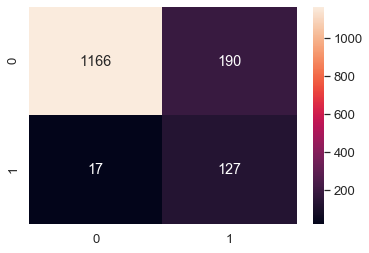

In [50]:
#Looking at the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_RFC_tuned), annot = True, fmt = 'd')

In [51]:
#Looking at the classification Report
#Printing classification report
print(classification_report(y_test, y_pred_RFC_tuned))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1356
           1       0.40      0.88      0.55       144

    accuracy                           0.86      1500
   macro avg       0.69      0.87      0.73      1500
weighted avg       0.93      0.86      0.88      1500



------

### Conclusion

1. This dataset is a classic class imbalance problem where the number of instances of one class (People who have taken a personal loan) is far fewer than the number of instances of the other class (People who have not taken a personal Loan).  
2. To tackle this problem, we cannot look at the predictive accuracy and say that the model is good. The model by deafult will try to maximize accuracy and reduce error, which inturn leads to misclassification of the minority class.
3. Which is why we will have to look at the recall of the model. Which is a measure of saying out of the total number of instances of class 1, how many of these instances have been correctly classified by the model as Class 1.

In [52]:
#Getting the recalls of the different models
#Logistic
recall_Logr = recall_score(y_test, y_pred_Logr)
#KNeighborsClassifier
recall_KNC = recall_score(y_test, y_pred_KNC)
#Gaussian Naive Bayes
recall_GNB = recall_score(y_test, y_pred_GNB)
#Random Forest Classifier
recall_RFC = recall_score(y_test, y_pred_RFC)
#Random Forest Classifier Tuned
recall_RFC_tuned = recall_score(y_test, y_pred_RFC_tuned)

In [53]:
#Let us look at the recall scores of our different models:
results = pd.DataFrame(index = ['Logistic','KNN_Classifier','Gaussian_NB','Random_Forest','Random_Forest_Tuned'],
            data = [recall_Logr,recall_KNC,recall_GNB,recall_RFC,recall_RFC_tuned], columns=['Recall Score'])
results.index.name = 'Model'
results

,Recall Score
Model,
Logistic,0.743056
KNN_Classifier,0.743056
Gaussian_NB,0.583333
Random_Forest,0.847222
Random_Forest_Tuned,0.881944


**Out of 144 people that have taken a personal loan in the testing set, the tuned Random Forest Classifier was able to correctly classify 127 of them. With a recall of 88%, the tuned Random Forest Classifier is the best model for this analysis.**

-------------